<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#check-GPS-information" data-toc-modified-id="check-GPS-information-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>check GPS information</a></span></li><li><span><a href="#select-a-subset-of-columns-to-keep" data-toc-modified-id="select-a-subset-of-columns-to-keep-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>select a subset of columns to keep</a></span></li><li><span><a href="#reshape-from-long-to-wide,-creat-new-column-month,-elec_use,-elec_bill," data-toc-modified-id="reshape-from-long-to-wide,-creat-new-column-month,-elec_use,-elec_bill,-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>reshape from long to wide, creat new column <code>month</code>, <code>elec_use</code>, <code>elec_bill</code>,</a></span></li><li><span><a href="#rename-columns" data-toc-modified-id="rename-columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>rename columns</a></span></li><li><span><a href="#merge-with-LandCover,-LandSurfaceTemperature,-VegetationField" data-toc-modified-id="merge-with-LandCover,-LandSurfaceTemperature,-VegetationField-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>merge with LandCover, LandSurfaceTemperature, VegetationField</a></span></li><li><span><a href="#clean-up-city-name" data-toc-modified-id="clean-up-city-name-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>clean up <code>city</code> name</a></span></li><li><span><a href="#create-dummies-for-north,-summer,-new-building,-single-family-house" data-toc-modified-id="create-dummies-for-north,-summer,-new-building,-single-family-house-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>create dummies for north, summer, new building, single family house</a></span></li><li><span><a href="#generate-LC_Type3,-Vege_Cover,-DD_sq" data-toc-modified-id="generate-LC_Type3,-Vege_Cover,-DD_sq-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>generate <code>LC_Type3</code>, <code>Vege_Cover</code>, <code>DD_sq</code></a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphs,-maps,-Degree-Days-Box-plot" data-toc-modified-id="Graphs,-maps,-Degree-Days-Box-plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Graphs, maps, <code>Degree Days</code> Box plot</a></span></li><li><span><a href="#outliers-in-elec_use" data-toc-modified-id="outliers-in-elec_use-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>outliers in <code>elec_use</code></a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Cross-Section-Model" data-toc-modified-id="Cross-Section-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cross Section Model</a></span></li><li><span><a href="#Panel-Model" data-toc-modified-id="Panel-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Panel Model</a></span></li><li><span><a href="#Summer" data-toc-modified-id="Summer-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summer</a></span></li><li><span><a href="#Winter" data-toc-modified-id="Winter-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Winter</a></span></li><li><span><a href="#North-China" data-toc-modified-id="North-China-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>North China</a></span></li><li><span><a href="#South-China" data-toc-modified-id="South-China-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>South China</a></span></li><li><span><a href="#Robust-Checks" data-toc-modified-id="Robust-Checks-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Robust Checks</a></span></li><li><span><a href="#Machine-Learning-Models" data-toc-modified-id="Machine-Learning-Models-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Machine Learning Models</a></span><ul class="toc-item"><li><span><a href="#prepare-training-and-test-set" data-toc-modified-id="prepare-training-and-test-set-3.8.1"><span class="toc-item-num">3.8.1&nbsp;&nbsp;</span>prepare training and test set</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.8.2"><span class="toc-item-num">3.8.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.8.3"><span class="toc-item-num">3.8.3&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.8.4"><span class="toc-item-num">3.8.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-3.8.5"><span class="toc-item-num">3.8.5&nbsp;&nbsp;</span>Boosting</a></span></li></ul></li></ul></li></ul></div>

In [1343]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

In [1344]:
pd.options.display.max_rows

60

In [1345]:
pd.options.display.max_columns = 80

# Data Wrangling

In [1346]:
# dfhousehold = pd.read_stata("CRECS2012年数据.dta")
# dfhousehold_copy = dfhousehold.copy()

In [1347]:
dfhousehold  = dfhousehold_copy.copy()

In [1348]:
# itr = pd.read_stata('CRECS2012年数据.dta', iterator=True)
# col_dict = itr.variable_labels()
# # itr.value_labels()

In [1349]:
type(itr)

pandas.io.stata.StataReader

In [1350]:
# dfhousehold.info(verbose=True, null_counts=True)

In [1351]:
dfhousehold.index.is_unique

True

In [1352]:
dfhousehold.serial.is_unique

False

In [1353]:
dfhousehold.index.is_monotonic

True

## check GPS information

In [1354]:
dfhousehold.longitude_deg.describe()

count    1450.000000
mean      114.280000
std         6.879738
min        83.000000
25%       112.000000
50%       115.000000
75%       118.000000
max       130.000000
Name: longitude_deg, dtype: float64

In [1355]:
dfhousehold.latitude_deg.describe()

count    1450.000000
mean       33.802759
std         6.009860
min        19.000000
25%        29.250000
50%        34.000000
75%        38.000000
max        50.000000
Name: latitude_deg, dtype: float64

In [1356]:
dfhousehold.longitude_min.describe()

count    1449.000000
mean       29.104900
std        22.362379
min         0.000000
25%        13.000000
50%        28.000000
75%        42.000000
max       408.000000
Name: longitude_min, dtype: float64

In [1357]:
dfhousehold.longitude_sec.describe()

count      1319.000000
mean        595.346313
std       20111.531250
min           0.000000
25%          15.000000
50%          30.000000
75%          47.000000
max      730318.000000
Name: longitude_sec, dtype: float64

In [1358]:
dfhousehold.latitude_min.describe()

count    1449.000000
mean       30.574499
std        20.525574
min         0.000000
25%        11.000000
50%        31.000000
75%        49.000000
max       172.000000
Name: latitude_min, dtype: float64

In [1359]:
dfhousehold.latitude_sec.describe()

count    1316.000000
mean       29.553146
std        18.404516
min         0.000000
25%        13.000000
50%        28.000000
75%        45.000000
max        91.000000
Name: latitude_sec, dtype: float64

In [1360]:
dfhousehold.loc[dfhousehold.longitude_min >60,'longitude_min'] = 0

In [1361]:
# checking
dfhousehold[dfhousehold.longitude_min >60]['longitude_min']

Series([], Name: longitude_min, dtype: float64)

In [1362]:
dfhousehold.longitude_min.fillna(0, inplace=True)

In [1363]:
dfhousehold.loc[dfhousehold.longitude_sec >60,'longitude_sec'] = 0
dfhousehold.longitude_sec.fillna(0, inplace=True)

dfhousehold.loc[dfhousehold.latitude_min >60,'latitude_min'] = 0
dfhousehold.latitude_min.fillna(0, inplace=True)

dfhousehold.loc[dfhousehold.latitude_sec >60,'latitude_sec'] = 0
dfhousehold.latitude_sec.fillna(0, inplace=True)

In [1364]:
dfhousehold['longitude'] = dfhousehold['longitude_deg'] + dfhousehold['longitude_min']/60 + dfhousehold['longitude_sec']/3600
dfhousehold['latitude'] = dfhousehold['latitude_deg'] + dfhousehold['latitude_min']/60 + dfhousehold['latitude_sec']/3600

## select a subset of columns to keep

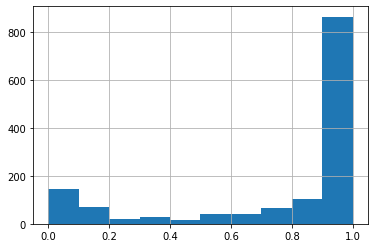

In [1365]:
dfhousehold.isna().mean().hist()

In [1366]:
dfhousehold = dfhousehold.loc[:, dfhousehold.isna().mean()<0.5]

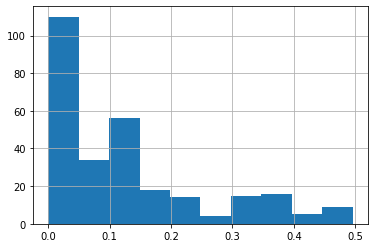

In [1367]:
dfhousehold.isna().mean().hist()

In [1368]:
dfhousehold.shape

(1450, 281)

In [1369]:
# cols= a2_1* (household info), b1-b26 (~b15) (house features), f3_*_a (elec_use), f3_*_d (elec_bill)
cols = []
for col in dfhousehold.columns:
    if col.startswith("a2_1") or \
     (col.startswith("b") and len(col) <=3) or \
        (col.count("_") == 2 and col.startswith("f3_") and (col[-2:] in ['_a', "_d"])):    
        cols.append(col)


In [1370]:
# some extra columns to keep
column_to_keep = ['index', 'serial', 'province', 'city', 'county', 'zipcode', 'respondent','latitude','longitude', 
                  'a1' ,'f1a']

In [1371]:
column_to_keep = column_to_keep + cols

In [1372]:
# select subset of columns
dfhousehold = dfhousehold[column_to_keep]

In [1373]:
dfhousehold.columns

Index(['index', 'serial', 'province', 'city', 'county', 'zipcode',
       'respondent', 'latitude', 'longitude', 'a1', 'f1a', 'a2_1_a', 'a2_1_b',
       'a2_1_c', 'a2_1_d', 'a2_1_e', 'a2_1_f', 'a2_1_g', 'a2_1_h', 'a2_1_i',
       'a2_1_j', 'a2_1_k', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8',
       'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b16', 'b17', 'b18', 'b19',
       'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'f3_1_a', 'f3_2_a',
       'f3_3_a', 'f3_4_a', 'f3_5_a', 'f3_6_a', 'f3_7_a', 'f3_8_a', 'f3_9_a',
       'f3_10_a', 'f3_11_a', 'f3_12_a', 'f3_13_a', 'f3_1_d', 'f3_2_d',
       'f3_3_d', 'f3_4_d', 'f3_5_d', 'f3_6_d', 'f3_7_d', 'f3_8_d', 'f3_9_d',
       'f3_10_d', 'f3_11_d', 'f3_12_d', 'f3_13_d'],
      dtype='object')

## reshape from long to wide, creat new column `month`, `elec_use`, `elec_bill`, 

In [1374]:
dfelec_use = pd.melt(dfhousehold, id_vars=['index'], value_vars=['f3_1_a',
 'f3_2_a',
 'f3_3_a',
 'f3_4_a',
 'f3_5_a',
 'f3_6_a',
 'f3_7_a',
 'f3_8_a',
 'f3_9_a',
 'f3_10_a',
 'f3_11_a',
 'f3_12_a'])

In [1375]:
dfelec_use.variable.replace({'f3_1_a':1,
                             'f3_2_a':2,
                             'f3_3_a':3,
                             'f3_4_a':4,
                             'f3_5_a':5,
                             'f3_6_a':6,
                             'f3_7_a':7,
                             'f3_8_a':8,
                             'f3_9_a':9,
                             'f3_10_a':10,
                             'f3_11_a':11,
                             'f3_12_a':12}, inplace=True)

In [1376]:
dfelec_use.rename(columns={'variable':"month", 'value':'elec_use'}, inplace=True)
# dfelec_use

In [1377]:
dfelec_bill = pd.melt(dfhousehold, id_vars=['index'], value_vars=['f3_1_d',
 'f3_2_d',
 'f3_3_d',
 'f3_4_d',
 'f3_5_d',
 'f3_6_d',
 'f3_7_d',
 'f3_8_d',
 'f3_9_d',
 'f3_10_d',
 'f3_11_d',
 'f3_12_d'])

In [1378]:
dfelec_bill.variable.replace({'f3_1_d':1,
                             'f3_2_d':2,
                             'f3_3_d':3,
                             'f3_4_d':4,
                             'f3_5_d':5,
                             'f3_6_d':6,
                             'f3_7_d':7,
                             'f3_8_d':8,
                             'f3_9_d':9,
                             'f3_10_d':10,
                             'f3_11_d':11,
                             'f3_12_d':12}, inplace=True)

In [1379]:
dfelec_bill.rename(columns={'variable':"month", 'value':'elec_bill'}, inplace=True)
#dfelec_bill

In [1380]:
dfelec = pd.merge(dfelec_use, dfelec_bill, how='inner')

In [1381]:
dfelec['price'] = dfelec.elec_bill/dfelec.elec_use
dfelec['Month'] = dfelec.month

In [1382]:
dfelec.head()

,index,month,elec_use,elec_bill,price,Month
0,1,1,265.0,140.029999,0.528415,1
1,2,1,78.0,41.209999,0.528333,1
2,3,1,330.0,184.559998,0.559273,1
3,4,1,200.0,105.599998,0.528000,1
4,5,1,265.0,140.000000,0.528302,1


In [1383]:
dfhousehold.columns

Index(['index', 'serial', 'province', 'city', 'county', 'zipcode',
       'respondent', 'latitude', 'longitude', 'a1', 'f1a', 'a2_1_a', 'a2_1_b',
       'a2_1_c', 'a2_1_d', 'a2_1_e', 'a2_1_f', 'a2_1_g', 'a2_1_h', 'a2_1_i',
       'a2_1_j', 'a2_1_k', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8',
       'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b16', 'b17', 'b18', 'b19',
       'b20', 'b21', 'b22', 'b23', 'b24', 'b25', 'b26', 'f3_1_a', 'f3_2_a',
       'f3_3_a', 'f3_4_a', 'f3_5_a', 'f3_6_a', 'f3_7_a', 'f3_8_a', 'f3_9_a',
       'f3_10_a', 'f3_11_a', 'f3_12_a', 'f3_13_a', 'f3_1_d', 'f3_2_d',
       'f3_3_d', 'f3_4_d', 'f3_5_d', 'f3_6_d', 'f3_7_d', 'f3_8_d', 'f3_9_d',
       'f3_10_d', 'f3_11_d', 'f3_12_d', 'f3_13_d'],
      dtype='object')

In [1384]:
dfhousehold.drop(labels=['f3_1_a','f3_2_a', 'f3_3_a', 'f3_4_a', 'f3_5_a', 'f3_6_a', 'f3_7_a', 'f3_8_a',
       'f3_9_a', 'f3_10_a', 'f3_11_a', 'f3_12_a', 'f3_13_a', 'f3_1_d',
       'f3_2_d', 'f3_3_d', 'f3_4_d', 'f3_5_d', 'f3_6_d', 'f3_7_d', 'f3_8_d',
       'f3_9_d', 'f3_10_d', 'f3_11_d', 'f3_12_d', 'f3_13_d'], axis=1, inplace=True)

In [1385]:
dfhousehold.head()

,index,serial,province,city,county,zipcode,respondent,latitude,longitude,a1,f1a,a2_1_a,a2_1_b,a2_1_c,a2_1_d,a2_1_e,a2_1_f,a2_1_g,a2_1_h,a2_1_i,a2_1_j,a2_1_k,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b16,b17,b18,b19,b20,b21,b22,b23,b24,b25,b26
0,1,2.010202e+17,广西,玉林市,容县,537500,1.0,22.860323,110.550392,3.0,(15-20] 万,本人,男,1974.0,全职工作,国有企业,公司职员,"电力,热力,燃气及水生产和供应业",汉族,大专,16.0,12.0,乡镇,多层住宅（4-6层）,3.0,一层,2004.0,7.0,他人,5.0,1990-1999,砖石混合,混凝土,"(2.8 , 4.5] 米",(70-90] m,(70-90] m,NaN,NaN,所有窗户,有,没有,没有,没有,没有,没有,"(1,2] 小时","(2,3] 小时"
1,2,2.010202e+17,广西,玉林市,容县,537500,1.0,22.859726,110.551969,3.0,(8-12] 万,本人,男,1966.0,兼职工作（包括退休后返聘）,私营企业,其他,金融业,汉族,大专,15.0,12.0,乡镇,多层住宅（4-6层）,1.0,四层及以上,1992.0,7.0,NaN,5.0,1990-1999,砖泥混合,混凝土,"(2.8 , 4.5] 米",(180-250] m2,(180-250] m2,NaN,NaN,没有更换过,没有,没有,没有,没有,有,有,"(2,3] 小时","(3,4] 小时"
2,3,2.010202e+17,广西,玉林市,容县,537500,1.0,22.855398,110.549361,3.0,(1-3] 万,本人,男,1969.0,全职工作,国有企业,事业单位职工,"电力,热力,燃气及水生产和供应业",汉族,大专,15.0,12.0,乡镇,多层住宅（4-6层）,1.0,四层及以上,1982.0,7.0,自有,5.0,1980-1989,砖头,混凝土,"(2.8 , 4.5] 米",(50-70] m2,(50-70] m2,NaN,NaN,少部分窗户,有,没有,没有,没有,没有,没有,"(4,5] 小时","(4,5] 小时"
3,4,2.010202e+17,广西,玉林市,容县,537500,1.0,22.857195,110.550453,5.0,≤1万,本人,男,1981.0,全职工作,国有企业,公司职员,"水利,环境和公共设施管理业",汉族,大专,14.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2000.0,7.0,他人,7.0,1980-1989,砖石混合,混凝土,"(2.8 , 4.5] 米",(50-70] m2,(50-70] m2,NaN,NaN,没有更换过,没有,没有,没有,没有,没有,没有,"(7,8] 小时","(6,7] 小时"
4,5,2.010202e+17,广西,玉林市,容县,537500,1.0,22.857195,110.550453,5.0,(5-8] 万,本人,男,1952.0,全职工作,国家机关或事业单位,事业单位职工,"公共管理,社会保障和社会组织",汉族,"高中（包括中专,职高）",12.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,3.0,一层,2004.0,7.0,他人,6.0,2000-2009,砖石混合,混凝土,"(2.8 , 4.5] 米",(50-70] m2,(50-70] m2,2.0,1.0,没有更换过,没有,没有,没有,没有,没有,没有,"(5,6] 小时","(6,7] 小时"


In [1386]:
dfhousehold = dfelec.merge(dfhousehold, how='inner' )

In [1387]:
dfhousehold.sort_values(by=['index','month'], inplace=True)

## rename columns

In [1388]:
# get a subset of col_dict, only the kept columns (cols)
# firt get a dict , with keys = cols, value = None
old_column_name = col_dict.fromkeys(cols)

In [1389]:
# get the values
for i in old_column_name:
    old_column_name[i] = col_dict[i]

In [1390]:
# old names
old_column_name

{'a2_1_a': '与户主关系',
 'a2_1_b': '性别',
 'a2_1_c': '出生年份',
 'a2_1_d': '2012年职业状况',
 'a2_1_e': '工作单位性质',
 'a2_1_f': '职业类型',
 'a2_1_g': '行业类别',
 'a2_1_h': '民族',
 'a2_1_i': '教育水平',
 'a2_1_j': '受教育总年限',
 'a2_1_k': '2012年在家中居住时间有几个月',
 'b1': '对该建筑所处地理位置描述',
 'b2': '按层数划分',
 'b3': '该住房位于该建筑第___层',
 'b4': '该家庭自身使用的住房空间有几层',
 'b5': '该户迁入该住房时间',
 'b6': '该户每周在该住房居住时长：____天',
 'b7': '现有房屋的产权是',
 'b8': '按房屋政策属性,该住房属于',
 'b9': '该住房建筑年代',
 'b10': '该建筑外墙主体材料',
 'b11': '该建筑屋顶主要材料',
 'b12': '该住房大致层高',
 'b13': '该住房建筑面积 ',
 'b14': '该住房实际使用面积',
 'b16': '卫生间数量',
 'b17': '阳台数量',
 'b18': '主动更换过多少窗户',
 'b19': '是否给门窗进行过封边处理',
 'b20': '是否给外墙进行过保暖改造',
 'b21': '是否给阁楼,天花板,管道等添加过隔热绝缘材料',
 'b22': '是否有私人独立的地下室',
 'b23': '是否有阁楼',
 'b24': '是否有封闭式,独立车库',
 'b25': '该房屋冬季平均每天日照时间 ',
 'b26': '该房屋夏季平均每天日照时间',
 'f3_1_a': '一月电力消费量',
 'f3_2_a': '二月电力消费量',
 'f3_3_a': '三月电力消费量',
 'f3_4_a': '四月电力消费量',
 'f3_5_a': '五月电力消费量',
 'f3_6_a': '六月电力消费量',
 'f3_7_a': '七月电力消费量',
 'f3_8_a': '八月电力消费量',
 'f3_9_a': '九月电力消费量',
 'f3_10_a': '十月电力消费量',
 

In [1391]:
# new names
column_namemapper = {'index':"ID",
                     'a1':"fsize",
                     'b1':'urban',
                     'f1a':'income',
                     
                     'a2_1_a': 'rltn_to_HoH',
                     'a2_1_b': 'sex',
                     'a2_1_c': 'birthyr',
                     'a2_1_d': 'employment',
                     'a2_1_e': 'employer',
                     'a2_1_f': 'occupation',
                     'a2_1_g': 'sector',
                     'a2_1_h': 'ethnicity',
                     'a2_1_i': 'edu_lvl',
                     'a2_1_j': 'edu_yrs',
                     'a2_1_k': 'mths_at_home',
                     
                     'b2': 'bldlvl',
                     'b3': 'level',
                     'b4': 'stories',
                     'b5': 'moveinyr',
                     'b5a': 'moveinmth',
                     'b6': 'daystyd',
                     'b7': 'own',
                     'b8': 'owntyp',
                     'b9': 'bltyr',
                     'b10': 'wall',
                     'b11': 'roof',
                     'b12': 'height',
                     'b13': 'size',
                     'b14': 'size2',
                     'b16': 'bathroom',
                     'b17': 'balcony',
                     'b18': 'newwdw',
                     'b19': 'window_D',
                     'b20': 'wall_D',
                     'b21': 'insltn_D',
                     'b22': 'bsmt_D',
                     'b23': 'attic_D',
                     'b24': 'garage_D',
                     'b25': 'dlgt_w',
                     'b26': 'dlgt_s'}

In [1392]:
dfhousehold.rename(column_namemapper, axis=1, inplace=True)

In [1393]:
dfhousehold.columns

Index(['ID', 'month', 'elec_use', 'elec_bill', 'price', 'Month', 'serial',
       'province', 'city', 'county', 'zipcode', 'respondent', 'latitude',
       'longitude', 'fsize', 'income', 'rltn_to_HoH', 'sex', 'birthyr',
       'employment', 'employer', 'occupation', 'sector', 'ethnicity',
       'edu_lvl', 'edu_yrs', 'mths_at_home', 'urban', 'bldlvl', 'level',
       'stories', 'moveinyr', 'daystyd', 'own', 'owntyp', 'bltyr', 'wall',
       'roof', 'height', 'size', 'size2', 'bathroom', 'balcony', 'newwdw',
       'window_D', 'wall_D', 'insltn_D', 'bsmt_D', 'attic_D', 'garage_D',
       'dlgt_w', 'dlgt_s'],
      dtype='object')

In [1394]:
dfhousehold.to_csv('dfhousehold_pre.csv')

## merge with LandCover, LandSurfaceTemperature, VegetationField

In [1395]:
LST_pre = pd.read_stata("LST_pre.dta")
LC_pre = pd.read_stata("LC_pre.dta")
VGF_pre = pd.read_stata("VGF_pre.dta")

In [1396]:
LST_pre.head()

,ID,DD_monthly,month,goodday_count
0,1,306.279388,1,8.0
1,1,8.446699,2,8.0
2,1,20.421148,3,8.0
3,1,210.733170,4,9.0
4,1,262.653107,5,15.0


In [1397]:
LC_pre.head()

,ID,LC_Type1,LC_Type2
0,1,13,13
1,2,13,13
2,3,13,13
3,4,13,13
4,5,13,13


In [1398]:
VGF_pre.head()

,ID,NonTree_Vege,NonVege,Tree_Cover
0,1,39.0,56.0,5.0
1,2,36.0,58.0,6.0
2,3,25.0,74.0,1.0
3,4,37.0,57.0,6.0
4,5,37.0,57.0,6.0


In [1399]:
# VGF_pre = VGF_pre.astype('Int16')

In [1400]:
VGF_pre.sample(5)

,ID,NonTree_Vege,NonVege,Tree_Cover
760,761,33.0,57.0,10.0
886,887,40.0,51.0,9.0
1040,1041,18.0,76.0,6.0
1348,1349,50.0,41.0,9.0
1223,1224,26.0,66.0,8.0


In [1401]:
master1 = dfhousehold.merge(LST_pre, on=['ID','month'])

In [1402]:
master1 = master1.merge(LC_pre, on='ID')

In [1403]:
master1 = master1.merge(VGF_pre, on='ID')

## clean up `city` name

first, create new column `city_` `county_` to store cleaned up city and county names

In [1406]:
master1['city_'] = master1.city
master1['county_'] = master1.county

In [1407]:
prov = ['上海', '北京', '天津', '重庆']

for i in master1.index:
    if master1.loc[i,'county'] == '':
        master1.loc[i,'county_'] = master1.loc[i,'city']
    if master1.loc[i,'province'] in prov:
        master1.loc[i,'city_'] = master1.loc[i,'province']

In [1408]:
print(master1[master1['province'] == '重庆'].groupby('ID')[['province','city','county','city_']].last().loc[(259,264,267),:])

    province  city county city_
ID                             
259       重庆  九龙坡区    谢家湾    重庆
264       重庆  九龙坡区    石新路    重庆
267       重庆  沙坪坝区   重庆大学    重庆


In [1409]:
# for i in ['上海', '北京', '天津', '重庆']:
#     print(master1[master1['province'] == i].groupby('ID')[['province','city','county','city_','county_']].first())

In [1410]:
master1[['province','city','county','city_','county_']]

,province,city,county,city_,county_
0,广西,玉林市,容县,玉林市,容县
1,广西,玉林市,容县,玉林市,容县
2,广西,玉林市,容县,玉林市,容县
3,广西,玉林市,容县,玉林市,容县
4,广西,玉林市,容县,玉林市,容县
...,...,...,...,...,...
17395,福建,漳州,芗城,漳州,芗城
17396,福建,漳州,芗城,漳州,芗城
17397,福建,漳州,芗城,漳州,芗城
17398,福建,漳州,芗城,漳州,芗城


 further clean up `city_` name, consolidate ##市 and ##

In [1411]:
master1.city.value_counts(dropna=False)

临沂市    624
潍坊     564
常德市    480
衡水市    432
玉林市    360
      ... 
承德      12
成都      12
项城市     12
济南      12
渝北区     12
Name: city, Length: 128, dtype: int64

In [1412]:
master1.city_.value_counts(dropna=False)

北京     864
上海     792
临沂市    624
潍坊     564
常德市    480
      ... 
项城市     12
运城      12
莆田      12
济南      12
保定市     12
Name: city_, Length: 99, dtype: int64

In [1413]:
city_names = set(master1.city_)
len(city_names)

99

In [1414]:
city_names_withshi = {i for i in city_names if i.endswith('市')}
len(city_names_withshi )

51

In [1415]:
city_names_withoutshi = {i.rstrip('市') for i in city_names }

In [1416]:
len(city_names_withoutshi)

91

In [1417]:
city_diff = city_names_withoutshi - city_names 

In [1418]:
len(city_diff)  # df.city = df.city.str.rstrip('shi')

43

In [1419]:
city_names_withshi_strip = {i.rstrip('市') for i in city_names_withshi}

In [1420]:
city_dup = city_names_withshi_strip - city_diff 

In [1421]:
city_dup

{'成都', '潍坊', '濮阳', '荆州', '荆门', '衡水', '赤峰', '长春'}

In [1422]:
# for similar case with '区'
city_names_withshi2 = {i for i in city_names if i.endswith('区')}
city_names_withoutshi2 = {i.rstrip('区') for i in city_names }
city_diff2 = city_names_withoutshi2 - city_names 
city_names_withshi_strip2 = {i.rstrip('区') for i in city_names_withshi2}
city_dup2 = city_names_withshi_strip2 - city_diff2 

In [1423]:
city_dup2

set()

In [1424]:
# 黄埔 黄浦区 likely a typo

In [1425]:
city_name_mapper = {'成都':'成都市', '潍坊':'潍坊市', '濮阳':'濮阳市', '荆州':'荆州市', '荆门':'荆门市', '衡水':'衡水市', 
                    '赤峰':'赤峰市',
                    '长春':'长春市'}

In [1426]:
master1.city_.replace(city_name_mapper, inplace=True)

In [1427]:
master1.city_.value_counts(dropna=False)

北京     864
上海     792
潍坊市    756
临沂市    624
衡水市    576
      ... 
抚州市     12
莆田      12
东营      12
本溪市     12
保定市     12
Name: city_, Length: 91, dtype: int64

In [1428]:
master1.city_.isna().mean()

0.0

## create dummies for north, summer, new building, single family house

##### create dummy for north china, central, south china

In [1430]:
north = ['内蒙古', '北京', '吉林', '天津', '宁夏回族自治区', '山东', '山西', '新疆', '河北', '河南', '甘肃', '辽宁','黑龙江']
master1["is_north"] = master1['province'].isin(north)
south = ['云南', '广东', '广西', '江西', '海南', '湖南', '福建', '贵州']
master1["is_south"] = master1['province'].isin(south)

In [1431]:
master1["is_north"].value_counts(dropna=False)

True     9792
False    7608
Name: is_north, dtype: int64

In [1432]:
master1["is_south"].value_counts(dropna=False)

False    13956
True      3444
Name: is_south, dtype: int64

In [1433]:
# check out central

##### create `sumer` `is_summer` dummy

In [1434]:
master1['summer'] = np.where((master1.month>=4) & (master1.month<=9) , 1, 0)

In [1435]:
master1['is_summer'] = (master1.month>=4) & (master1.month<=9)

In [1436]:
pd.crosstab(master1.summer, master1.is_summer)

is_summer,False,True
summer,,
0,8700,0
1,0,8700


##### create new building `new` dummy

In [1437]:
master1.bltyr.value_counts(dropna=False)

2000-2009    8400
1990-1999    5148
1980-1989    2196
2010年及以后      924
1970-1979     384
1960-1969     132
早于1949年        96
NaN            84
1949-1959      36
Name: bltyr, dtype: int64

In [1438]:
master1.bltyr.dtypes

CategoricalDtype(categories=['早于1949年', '1949-1959', '1960-1969', '1970-1979',
                  '1980-1989', '1990-1999', '2000-2009', '2010年及以后'],
                 ordered=True)

In [1439]:
# master1.drop(columns='new', inplace=True)

In [1440]:
master1.loc[[359],'bltyr'] 

359    1990-1999
Name: bltyr, dtype: category
Categories (8, object): [早于1949年 < 1949-1959 < 1960-1969 < 1970-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010年及以后]

In [1441]:
master1.loc[359,'bltyr'] >= '1949-1959'

True

In [1442]:
master1.loc[[360],'bltyr'] 

360    NaN
Name: bltyr, dtype: category
Categories (8, object): [早于1949年 < 1949-1959 < 1960-1969 < 1970-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010年及以后]

In [1443]:
type(master1.bltyr[360])

float

In [1444]:
# new = []
# old = ['早于1949年', '1949-1959','1960-1969']

In [1445]:
def gen_newbld(row):
    new = None
    if isinstance(row.bltyr, str):
        return row.bltyr >= '1990-1999' 
    return new

In [1446]:
master1['new']= master1.apply(gen_newbld, axis=1)

In [1447]:
master1['new'].dtype

dtype('O')

In [1448]:
master1['new'].value_counts(dropna=False)

True     14568
False     2748
NaN         84
Name: new, dtype: int64

In [1449]:
# '早于1949年' wrong!

In [1450]:
pd.crosstab(master1.new, master1.bltyr, dropna=False)

bltyr,早于1949年,1949-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010年及以后
new,,,,,,,,
False,0,36,132,384,2196,0,0,0
True,96,0,0,0,0,5148,8400,924


In [1451]:
master1['new'] = np.where(master1.bltyr >= '1990-1999' , 1, 0)

In [1452]:
master1.loc[master1.bltyr.isnull(), 'new'] = None

In [1453]:
master1['new'].value_counts(dropna=False)

1.0    14472
0.0     2844
NaN       84
Name: new, dtype: int64

In [1454]:
pd.crosstab(master1.new, master1.bltyr, dropna=False, margins=True)

bltyr,早于1949年,1949-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010年及以后,All
new,,,,,,,,,
0.0,96,36,132,384,2196,0,0,0,2844
1.0,0,0,0,0,0,5148,8400,924,14472
All,96,36,132,384,2196,5148,8400,924,17400


In [1455]:
# 'is_new'

In [1456]:
master1['is_new'] = master1.bltyr >= '1990-1999'

In [1457]:
# boolean NA type?

In [1458]:
master1.loc[master1.bltyr.isnull(), 'is_new'] = np.nan

In [1459]:
# turn is_new to float
master1['is_new'].value_counts(dropna=False)

1.0    14472
0.0     2844
NaN       84
Name: is_new, dtype: int64

In [1460]:
pd.crosstab(master1.is_new, master1.bltyr, dropna=False)

bltyr,早于1949年,1949-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010年及以后
is_new,,,,,,,,
0.0,96,36,132,384,2196,0,0,0
1.0,0,0,0,0,0,5148,8400,924


##### create single family home `sf` dummy

In [1461]:
master1.bldlvl.value_counts(dropna=False)

多层住宅（4-6层）             8652
低层住宅（1-3层）             5292
中高层住宅（7-10层,也称为小高层）    2028
高层住宅（11-30层）           1284
超高层住宅（30层以上）            108
NaN                      36
Name: bldlvl, dtype: int64

In [1462]:
master1.bldlvl.cat.categories

Index(['低层住宅（1-3层）', '多层住宅（4-6层）', '中高层住宅（7-10层,也称为小高层）', '高层住宅（11-30层）',
       '超高层住宅（30层以上）'],
      dtype='object')

In [1463]:
master1.level.value_counts(dropna=False)[:10]

1.0     5844
2.0     2424
3.0     2292
4.0     2220
5.0     1848
6.0     1080
7.0      444
NaN      168
11.0     144
9.0      132
10.0     132
Name: level, dtype: int64

In [1464]:
master1['sf'] = np.where(master1.bldlvl == '低层住宅（1-3层）' , 1, 0)

In [1465]:
master1.loc[master1.bldlvl.isnull(), 'sf'] = np.nan

In [1466]:
master1['sf'].value_counts(dropna=False)

0.0    12072
1.0     5292
NaN       36
Name: sf, dtype: int64

## generate `LC_Type3`, `Vege_Cover`, `DD_sq`

In [1467]:
master1['Vege_Cover'] = master1['Tree_Cover'] + master1['NonTree_Vege'] 

In [1469]:
LC_Type2_mapper ={0: 'Water', 
                  2: 'Evergreen',
                 5: 'Mixed forest',
                 8: 'Woody Savanna',
                 9: 'Savanna',
                 10: 'Grassland',
                 11: 'Wetland',
                 12: 'Cropland',
                 13: 'Built-up/Urban',
                 14: 'cropland mosaic',
                 15: 'Non-Vegetated'}

In [1470]:
master1['LC_Type2s'] = master1.LC_Type2.replace(LC_Type2_mapper)

In [1472]:
pd.crosstab(master1['LC_Type2'], master1['LC_Type2s'], dropna=False)

LC_Type2s,Built-up/Urban,Cropland,Evergreen,Grassland,Mixed forest,Non-Vegetated,Savanna,Water,Wetland,Woody Savanna,cropland mosaic
LC_Type2,,,,,,,,,,,
0,0,0,0,0,0,0,0,336,0,0,0
2,0,0,48,0,0,0,0,0,0,0,0
5,0,0,0,0,48,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,96,0
9,0,0,0,0,0,0,2040,0,0,0,0
10,0,0,0,744,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,108,0,0
12,0,2208,0,0,0,0,0,0,0,0,0
13,11172,0,0,0,0,0,0,0,0,0,0


In [1473]:
def gen_LC3(LC_Type2):
    if LC_Type2 ==0 or LC_Type2==11:
        return 'water'
    if LC_Type2 >0 and LC_Type2<10:
        return 'forest/savanna'
    if LC_Type2 ==10:
        return 'grassland'
    if LC_Type2 ==12 or LC_Type2==14:
        return 'cropland'
    if LC_Type2 ==13:
        return 'Urban built-up'
    if LC_Type2 ==15:
        return 'barren'

In [1474]:
LC_Type3_mapper ={0: 'water', 
                  2: 'forest/savanna',
                 5: 'forest/savanna',
                 8: 'forest/savanna',
                 9: 'forest/savanna',
                 10: 'grassland',
                 11: 'water',
                 12: 'cropland',
                 13: 'Built-up/Urban',
                 14: 'cropland',
                 15: 'non-Vegetated'}

In [1475]:
#master1['LC_Type3'] = master1['LC_Type2'].apply(gen_LC3)

In [1476]:
master1['LC_Type3'] = master1['LC_Type2'].replace(LC_Type3_mapper)

In [1477]:
master1['LC_Type3'].value_counts(dropna=False)

Built-up/Urban    11172
cropland           2724
forest/savanna     2232
grassland           744
water               444
non-Vegetated        84
Name: LC_Type3, dtype: int64

In [1478]:
master1['LC_Type3'].value_counts(dropna=False)

Built-up/Urban    11172
cropland           2724
forest/savanna     2232
grassland           744
water               444
non-Vegetated        84
Name: LC_Type3, dtype: int64

In [1479]:
# def gen_LC4(LC_Type2):
#     if LC_Type2 ==0 or LC_Type2==11:
#         return 'water'
#     elif LC_Type2 ==13:
#         return 'Urban built-up'
#     elif LC_Type2 ==15:
#         return 'barren'
#     else:
#         return 'vege'

In [1480]:
LC_Type4_mapper ={0: 'water', 
                  2: 'vege',
                 5: 'vege',
                 8: 'vege',
                 9: 'vege',
                 10: 'vege',
                 11: 'water',
                 12: 'vege',
                 13: 'Built-up/Urban',
                 14: 'vege',
                 15: 'non-Vegetated'}

In [1481]:
master1['LC_Type4'] = master1['LC_Type2'].replace(LC_Type4_mapper)
master1['LC_Type4'].value_counts(dropna=False)

Built-up/Urban    11172
vege               5700
water               444
non-Vegetated        84
Name: LC_Type4, dtype: int64

In [1482]:
#master1['LC_Type4'] = master1['LC_Type2'].apply(gen_LC4)
master1['LC_Type4'].value_counts(dropna=False)

Built-up/Urban    11172
vege               5700
water               444
non-Vegetated        84
Name: LC_Type4, dtype: int64

In [1483]:
# # diff from Stata
# def gen_LC5(LC_Type2):
#     if LC_Type2 ==0 or LC_Type2==11:
#         return 'water'
#     elif LC_Type2 ==13:
#         return 'Urban built-up'
#     elif LC_Type2 ==15:
#         return 'barren'
#     elif LC_Type2 ==12 or LC_Type2==14:
#         return 'cropland'
#     else:
#         return 'natural_vege'

In [1484]:
LC_Type5_mapper ={0: 'water', 
                  2: 'natural_vege',
                 5: 'natural_vege',
                 8: 'natural_vege',
                 9: 'natural_vege',
                 10: 'natural_vege',
                 11: 'water',
                 12: 'cropland',
                 13: 'Built-up/Urban',
                 14: 'cropland',
                 15: 'non-Vegetated'}

In [1485]:
master1['LC_Type5'] = master1['LC_Type2'].replace(LC_Type5_mapper)
master1['LC_Type5'].value_counts(dropna=False)

Built-up/Urban    11172
natural_vege       2976
cropland           2724
water               444
non-Vegetated        84
Name: LC_Type5, dtype: int64

In [1486]:
#master1['LC_Type5'] = master1['LC_Type2'].apply(gen_LC5)
master1['LC_Type5'].value_counts(dropna=False)

Built-up/Urban    11172
natural_vege       2976
cropland           2724
water               444
non-Vegetated        84
Name: LC_Type5, dtype: int64

In [1487]:
master1['DD_sq'] = master1['DD_monthly'] ** 2

In [1488]:
master1.columns

Index(['ID', 'month', 'elec_use', 'elec_bill', 'price', 'Month', 'serial',
       'province', 'city', 'county', 'zipcode', 'respondent', 'latitude',
       'longitude', 'fsize', 'income', 'rltn_to_HoH', 'sex', 'birthyr',
       'employment', 'employer', 'occupation', 'sector', 'ethnicity',
       'edu_lvl', 'edu_yrs', 'mths_at_home', 'urban', 'bldlvl', 'level',
       'stories', 'moveinyr', 'daystyd', 'own', 'owntyp', 'bltyr', 'wall',
       'roof', 'height', 'size', 'size2', 'bathroom', 'balcony', 'newwdw',
       'window_D', 'wall_D', 'insltn_D', 'bsmt_D', 'attic_D', 'garage_D',
       'dlgt_w', 'dlgt_s', 'DD_monthly', 'goodday_count', 'LC_Type1',
       'LC_Type2', 'NonTree_Vege', 'NonVege', 'Tree_Cover', 'city_', 'county_',
       'is_north', 'is_south', 'summer', 'is_summer', 'new', 'is_new', 'sf',
       'Vege_Cover', 'LC_Type2s', 'LC_Type3', 'LC_Type4', 'LC_Type5', 'DD_sq'],
      dtype='object')

In [1489]:
master1.shape

(17400, 74)

In [1086]:
# gen m_elec_use=0
# replace m_elec_use=1 if elec_use==.

# by ID: gen m_elec_use_sum = sum(m_elec_use)
# by ID: egen m_elec_use_tot = total(m_elec_use)
# order m_elec_use m_elec_use_sum m_elec_use_tot, after (elec_use)

In [1492]:
master1.to_csv('master1.csv')
#'master1.csv', clean merged data w/ selected var, 17400*76

# Analysis

## Graphs, maps, `Degree Days` Box plot

In [1088]:
%%HTML
<div class='tableauPlaceholder' id='viz1583895459344' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;6Z&#47;6ZS9S6WKB&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;6ZS9S6WKB' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;6Z&#47;6ZS9S6WKB&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1583895459344');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [1579]:
%%HTML
<div class='tableauPlaceholder' id='viz1584922312047' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WW&#47;WWW5YPQG4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;WWW5YPQG4' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WW&#47;WWW5YPQG4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1584922312047');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [1089]:
# master1 = master1.reset_index()

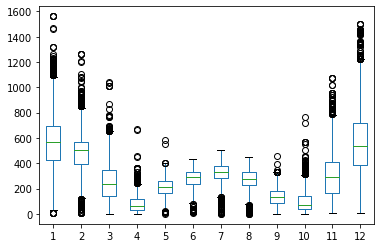

In [1493]:
master1.pivot_table(values='DD_monthly',
    index='ID',
    columns=['month']).plot(kind='box')

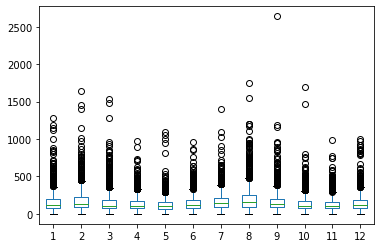

In [1494]:
master1[master1.elec_use<3000].pivot_table(values='elec_use',
    index='ID',
    columns=['month']).plot(kind='box')

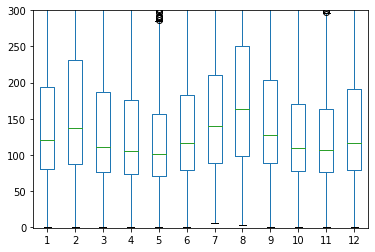

In [1502]:
master1[master1.elec_use<3000].pivot_table(values='elec_use',
    index='ID',
    columns=['month']).plot(kind='box', ylim=(-1,300))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c625ea3c8>,
      dtype=object)

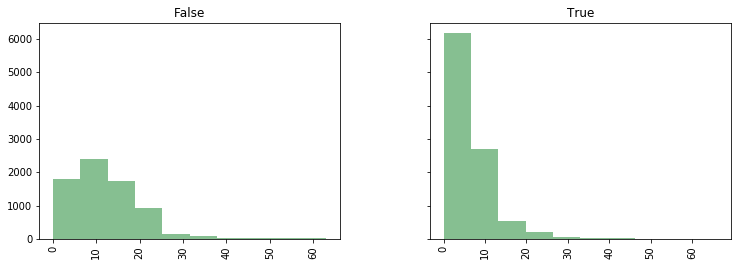

In [1515]:
master1.hist(column='Tree_Cover', by='is_north',grid=True, figsize=(12,4), sharey=True, color='#86bf91')

is_north
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Tree_Cover, dtype: object

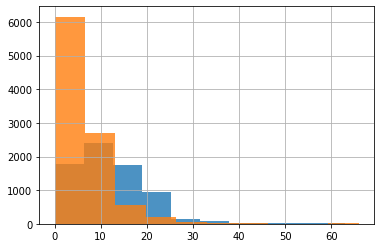

In [1503]:
master1.groupby('is_north')['Tree_Cover'].hist(alpha=0.8, label='is_north')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c49b0fe48>,
      dtype=object)

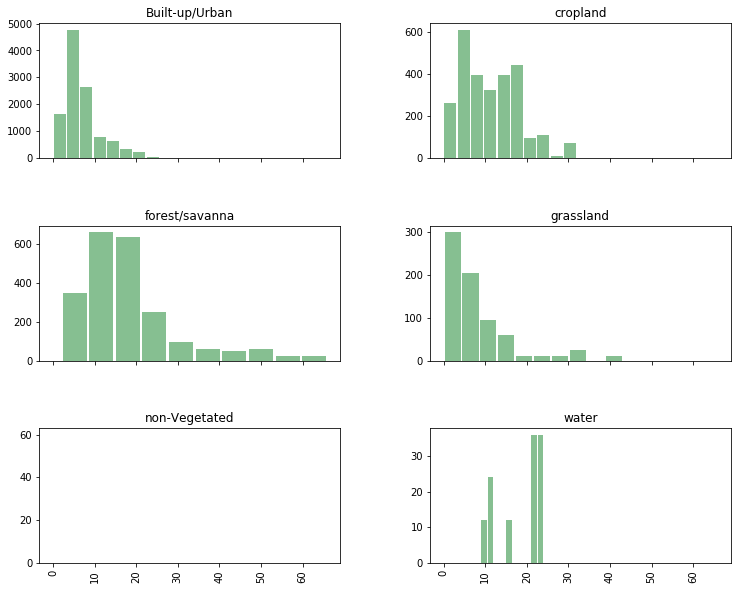

In [1094]:
master1.hist(column='Tree_Cover', by='LC_Type3', grid=False, figsize=(12,10), layout=(3,2),
             sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

##### DD_monthly vs elec_use

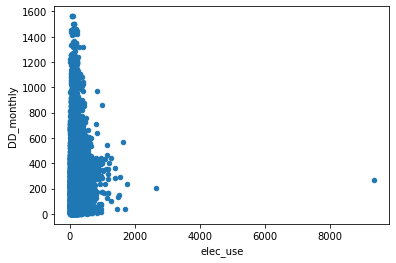

In [1517]:
# DD_monthly vs elec_use
master1.plot(x='elec_use', y='DD_monthly', kind='scatter')

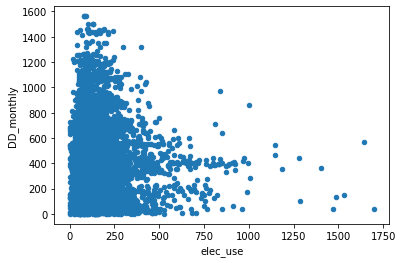

In [1096]:
# winter
master1[~master1.is_summer].plot(x='elec_use', y='DD_monthly', kind='scatter')

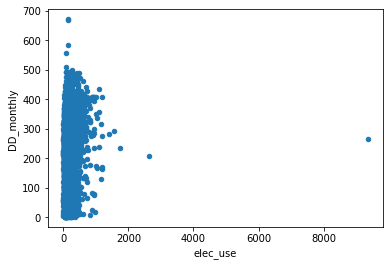

In [1097]:
# summer
master1[master1.is_summer].plot(x='elec_use', y='DD_monthly', kind='scatter')

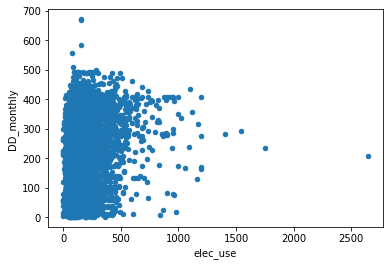

In [1516]:
# summer
master1[(master1.elec_use<3000) & master1.is_summer].plot(x='elec_use', y='DD_monthly', kind='scatter')

## outliers in `elec_use`

In [1518]:
master1.elec_use.quantile(.999)

1195.0359

In [1519]:
master1[master1.elec_use > 2000]

,ID,month,elec_use,elec_bill,price,Month,serial,province,city,county,zipcode,respondent,latitude,longitude,fsize,income,rltn_to_HoH,sex,birthyr,employment,employer,occupation,sector,ethnicity,edu_lvl,edu_yrs,mths_at_home,urban,bldlvl,level,stories,moveinyr,daystyd,own,owntyp,bltyr,wall,roof,height,size,size2,bathroom,balcony,newwdw,window_D,wall_D,insltn_D,bsmt_D,attic_D,garage_D,dlgt_w,dlgt_s,DD_monthly,goodday_count,LC_Type1,LC_Type2,NonTree_Vege,NonVege,Tree_Cover,city_,county_,is_north,is_south,summer,is_summer,new,is_new,sf,Vege_Cover,LC_Type2s,LC_Type3,LC_Type4,LC_Type5,DD_sq
2335,195,8,9345.0,195.000000,0.020867,8,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,265.009705,31.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,1,True,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,70230.140625
4868,406,9,2641.0,1513.290039,0.572999,9,2.011201e+17,湖北,武汉市,武昌区,430071,3.0,30.554167,114.316111,3.0,(5-8] 万,本人,男,1967.0,全职工作,国家机关或事业单位,事业单位职工,"文化,体育和娱乐业",汉族,大学,16.0,12.0,城市（县级市及以上）,高层住宅（11-30层）,17.0,两层,2007.0,7.0,自有,2.0,2000-2009,混凝土,混凝土,① ≤2.8米,(180-250] m2,(180-250] m2,3.0,1.0,没有更换过,有,没有,没有,没有,没有,没有,"(5,6] 小时","(2,3] 小时",206.986832,22.0,13,13,26.0,68.0,6.0,武汉市,武昌区,False,False,1,True,1.0,1.0,0.0,32.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,42843.546875


In [1520]:
master1[master1['ID'].isin([195,406])]

,ID,month,elec_use,elec_bill,price,Month,serial,province,city,county,zipcode,respondent,latitude,longitude,fsize,income,rltn_to_HoH,sex,birthyr,employment,employer,occupation,sector,ethnicity,edu_lvl,edu_yrs,mths_at_home,urban,bldlvl,level,stories,moveinyr,daystyd,own,owntyp,bltyr,wall,roof,height,size,size2,bathroom,balcony,newwdw,window_D,wall_D,insltn_D,bsmt_D,attic_D,garage_D,dlgt_w,dlgt_s,DD_monthly,goodday_count,LC_Type1,LC_Type2,NonTree_Vege,NonVege,Tree_Cover,city_,county_,is_north,is_south,summer,is_summer,new,is_new,sf,Vege_Cover,LC_Type2s,LC_Type3,LC_Type4,LC_Type5,DD_sq
2328,195,1,178.0,99.019997,0.556292,1,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,1074.959839,31.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,0,False,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,1.155539e+06
2329,195,2,NaN,NaN,NaN,2,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,814.999451,29.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,0,False,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,6.642241e+05
2330,195,3,NaN,NaN,NaN,3,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,575.029907,31.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,0,False,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,3.306594e+05
2331,195,4,NaN,NaN,NaN,4,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,181.199509,30.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,1,True,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,3.283326e+04
2332,195,5,NaN,89.250000,NaN,5,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,92.870216,31.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,1,True,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,8.624877e+03
2333,195,6,NaN,9.770000,NaN,6,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,228.020157,30.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,1,True,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,5.199319e+04
2334,195,7,NaN,NaN,NaN,7,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m2,1.0,1.0,没有更换过,有,有,没有,NaN,没有,没有,"(6,7] 小时",>8小时,300.099457,31.0,13,13,34.0,62.0,4.0,白城,镇贵,True,False,1,True,1.0,1.0,0.0,38.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,9.005969e+04
2335,195,8,9345.0,195.000000,0.020867,8,2.010202e+17,吉林,白城,镇贵,137300,1.0,45.849167,123.197500,3.0,(5-8] 万,本人,男,1970.0,全职工作,国家机关或事业单位,公务员,"公共管理,社会保障和社会组织",汉族,大专,15.0,12.0,城市（县级市及以上）,多层住宅（4-6层）,6.0,一层,2004.0,7.0,自有,6.0,2000-2009,砖泥混合,瓦片,① ≤2.8米,(70-90] m,(50-70] m

In [1521]:
master1.loc[[4868],:]

,ID,month,elec_use,elec_bill,price,Month,serial,province,city,county,zipcode,respondent,latitude,longitude,fsize,income,rltn_to_HoH,sex,birthyr,employment,employer,occupation,sector,ethnicity,edu_lvl,edu_yrs,mths_at_home,urban,bldlvl,level,stories,moveinyr,daystyd,own,owntyp,bltyr,wall,roof,height,size,size2,bathroom,balcony,newwdw,window_D,wall_D,insltn_D,bsmt_D,attic_D,garage_D,dlgt_w,dlgt_s,DD_monthly,goodday_count,LC_Type1,LC_Type2,NonTree_Vege,NonVege,Tree_Cover,city_,county_,is_north,is_south,summer,is_summer,new,is_new,sf,Vege_Cover,LC_Type2s,LC_Type3,LC_Type4,LC_Type5,DD_sq
4868,406,9,2641.0,1513.290039,0.572999,9,2.011201e+17,湖北,武汉市,武昌区,430071,3.0,30.554167,114.316111,3.0,(5-8] 万,本人,男,1967.0,全职工作,国家机关或事业单位,事业单位职工,"文化,体育和娱乐业",汉族,大学,16.0,12.0,城市（县级市及以上）,高层住宅（11-30层）,17.0,两层,2007.0,7.0,自有,2.0,2000-2009,混凝土,混凝土,① ≤2.8米,(180-250] m2,(180-250] m2,3.0,1.0,没有更换过,有,没有,没有,没有,没有,没有,"(5,6] 小时","(2,3] 小时",206.986832,22.0,13,13,26.0,68.0,6.0,武汉市,武昌区,False,False,1,True,1.0,1.0,0.0,32.0,Built-up/Urban,Built-up/Urban,Built-up/Urban,Built-up/Urban,42843.546875


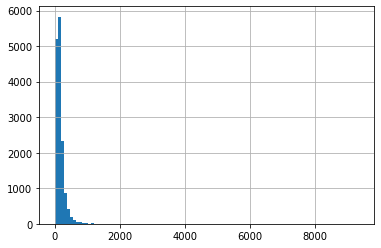

In [1522]:
master1.elec_use.hist(grid=True, bins=100)

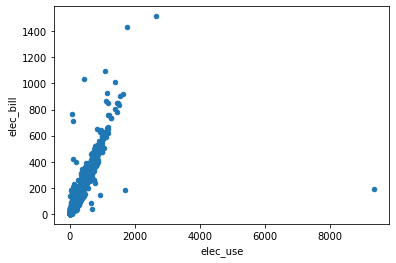

In [1523]:
master1.plot(x='elec_use', y='elec_bill', kind='scatter')

In [1529]:
master1['elec_use'].count()

15103

##### drop `elec_use` >3000

In [1527]:
master1_copy = master1.copy()
master1 = master1[master1['elec_use']<3000]
# note also dropped all NaNs
# kept index

In [1528]:
master1['elec_use'].count()

15103

In [1531]:
# master1[master1['elec_use']<2000].elec_use.hist(grid=True, bins=100)

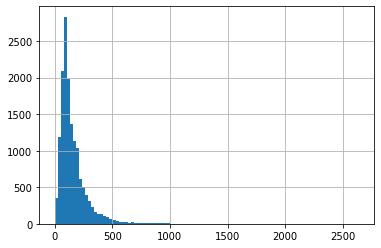

In [1532]:
master1.elec_use.hist(grid=True, bins=100)

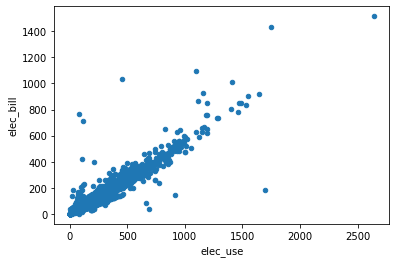

In [1533]:
master1.plot(x='elec_use', y='elec_bill', kind='scatter')

In [1534]:
master1.columns

Index(['ID', 'month', 'elec_use', 'elec_bill', 'price', 'Month', 'serial',
       'province', 'city', 'county', 'zipcode', 'respondent', 'latitude',
       'longitude', 'fsize', 'income', 'rltn_to_HoH', 'sex', 'birthyr',
       'employment', 'employer', 'occupation', 'sector', 'ethnicity',
       'edu_lvl', 'edu_yrs', 'mths_at_home', 'urban', 'bldlvl', 'level',
       'stories', 'moveinyr', 'daystyd', 'own', 'owntyp', 'bltyr', 'wall',
       'roof', 'height', 'size', 'size2', 'bathroom', 'balcony', 'newwdw',
       'window_D', 'wall_D', 'insltn_D', 'bsmt_D', 'attic_D', 'garage_D',
       'dlgt_w', 'dlgt_s', 'DD_monthly', 'goodday_count', 'LC_Type1',
       'LC_Type2', 'NonTree_Vege', 'NonVege', 'Tree_Cover', 'city_', 'county_',
       'is_north', 'is_south', 'summer', 'is_summer', 'new', 'is_new', 'sf',
       'Vege_Cover', 'LC_Type2s', 'LC_Type3', 'LC_Type4', 'LC_Type5', 'DD_sq'],
      dtype='object')

##### D log transformation

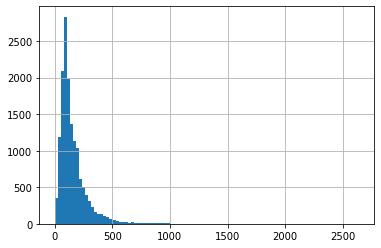

In [1536]:
# after dropping outlier, still skewed
master1.elec_use.hist(grid=True, bins=100)

In [1537]:
master1['elec_ln'] = np.log1p(master1.elec_use)

/Users/JK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


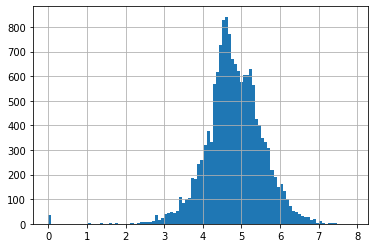

In [1538]:
master1['elec_ln'].hist(grid=True, bins=100)

In [1539]:
# master1_copy['elec_ln'].hist(grid=True, bins=100)

# Models

In [1540]:
master = pd.read_stata('master.dta')

In [1541]:
master.columns

Index(['ID', 'month', 'elec_use', 'm_elec_use', 'm_elec_use_sum',
       'm_elec_use_tot', 'elec_bill', 'price', 'serial', 'province', 'city',
       'county', 'latitude', 'longitude', 'fsize', 'income', 'urban', 'a2_1_a',
       'a2_1_b', 'a2_1_c', 'a2_1_d', 'a2_1_e', 'a2_1_f', 'a2_1_g', 'a2_1_h',
       'a2_1_i', 'a2_1_j', 'a2_1_k', 'b2', 'b3', 'b4', 'b5', 'b5a', 'b6', 'b7',
       'b8', 'b9', 'new', 'b10', 'b11', 'b12', 'b13', 'b14', 'b16', 'b16a',
       'b16b', 'b16c', 'b17', 'b17a', 'b17b', 'b18', 'b19', 'b19a', 'b19b',
       'b20', 'b20a', 'b20b', 'b21', 'b21a', 'b21b', 'b22', 'b22a', 'b22b',
       'b22c', 'b22d', 'b23', 'b23a', 'b23b', 'b23c', 'b23d', 'b24', 'b24a',
       'b24b', 'b24c', 'b24d', 'b24e', 'b24f', 'b25', 'b26', 'DD_monthly',
       'goodday_count', 'LC_Type1', 'LC_Type2', 'LC_Type3', 'LC_Type5',
       'LC_Type4', 'NonTree_Vege', 'NonVege', 'Tree_Cover', 'province_n',
       'north', 'summer', 'sf', 'DD_sq', 'm_elec_use_temp', '_est_est1'],
      dtype='object'

In [1542]:
master['LC_Type3s'] = master['LC_Type2'].replace(LC_Type3_mapper)

In [1543]:
# master['LC_Type3'] categorical, master['LC_Type3s'] string
pd.crosstab(master['LC_Type3'],master['LC_Type3s'])

LC_Type3s,Built-up/Urban,cropland,forest/savanna,grassland,non-Vegetated,water
LC_Type3,,,,,,
Urban/Built up,11172,0,0,0,0,0
forest/shrubland/savanna,0,0,2232,0,0,0
grassland,0,0,0,744,0,0
cropland,0,2724,0,0,0,0
water,0,0,0,0,0,444
barren,0,0,0,0,84,0


In [169]:

# from linearmodels.datasets import wage_panel

# data = wage_panel.load()
# data = data.set_index(['nr','year'])
# dependent = data.lwage
# exog = sm.add_constant(data[['expersq','married','union']])
# mod = PanelOLS(dependent, exog, entity_effect=True)
# res = mod.fit(cov_type='unadjusted')
# res

In [1544]:
master_copy = master.copy()
master = master[master['elec_use']<3000]

In [1545]:
master.shape

(15103, 97)

In [1546]:
master1.shape

(15103, 75)

## Cross Section Model

In [1547]:
import statsmodels.formula.api as smf

In [1131]:
master1.income.value_counts(dropna=False)

(3-5] 万        3404
(5-8] 万        3136
(8-12] 万       2627
(1-3] 万        2311
(12-15] 万       926
(15-20] 万       926
(20-25] 万       573
≤1万             447
(25-30] 万       147
(45-50] 万       108
NaN              98
(35-40] 万        88
(30-35]万         82
(40-45] 万        60
(80-120]万        60
(50-80] 万        50
(120-200] 万      48
(200-500] 万      12
Name: income, dtype: int64

In [1132]:
master1['size'].value_counts(dropna=False)

(90-120] m2     4063
(120-150] m2    3323
(70-90] m       2647
(50-70] m2      1627
(180-250] m2    1138
(150-180] m2     830
 >250m2          756
(30-50] m2       559
NaN               66
(12-30] m2        58
≤12m2             36
Name: size, dtype: int64

In [1133]:
master1['bltyr'].value_counts(dropna=False)

2000-2009    7220
1990-1999    4538
1980-1989    1962
2010年及以后      753
1970-1979     360
1960-1969     106
NaN            67
早于1949年        67
1949-1959      30
Name: bltyr, dtype: int64

In [1134]:
master1['urban'].value_counts(dropna=False)

城市（县级市及以上）    9464
农村            3077
乡镇            2514
NaN             48
Name: urban, dtype: int64

In [1135]:
master1['own'].value_counts(dropna=False)

自有     13948
他人      1048
NaN      107
Name: own, dtype: int64

In [1548]:
# tried PooledOLS, bug w/ categoricals such as income, urban, has NaN
# cs_LC = PooledOLS.from_formula("elec_use ~ 1 + DD_monthly*(LC_Type3) + fsize + C(income) + urban + own + size + bltyr + \
#                                 Month + province", data=master1)
# res_cs_LC = cs_LC.fit()
# print(res_cs_LC)

In [1549]:
cs_LC = smf.ols("elec_use ~ 1 + DD_monthly*(LC_Type3) + fsize + C(income) + urban + own + size + bltyr + \
                                C(Month) + province", data=master1, subset=None, drop_cols=None)
res_cs_LC = cs_LC.fit()
print(res_cs_LC.summary())

                            OLS Regression Results                            
Dep. Variable:               elec_use   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.64
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:09:48   Log-Likelihood:                -86961.
No. Observations:               14179   AIC:                         1.741e+05
Df Residuals:                   14094   BIC:                         1.747e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [1550]:
# robust Standard Errors, smaller?

In [1551]:
res_cs_LC_robust = res_cs_LC.get_robustcov_results(cov_type='HC1', use_t=None)

In [1552]:
res_cs_LC_robust.cov_kwds

{'use_t': True,
 'adjust_df': False,
 'description': 'Standard Errors are heteroscedasticity robust (HC1)'}

In [1553]:
res_cs_LC_robust.cov_params_default

array([[ 3.00892425e+02, -5.47111289e+00, -3.37232674e+00, ...,
         6.31141133e-03, -5.19184399e-02, -1.69116771e+00],
       [-5.47111289e+00,  1.66889076e+01,  7.84040520e+00, ...,
        -9.31310267e-03, -5.59973608e-03,  2.07263736e-01],
       [-3.37232674e+00,  7.84040520e+00,  2.55838847e+01, ...,
        -7.55061455e-03, -1.37603696e-02, -8.17583226e-02],
       ...,
       [ 6.31141133e-03, -9.31310267e-03, -7.55061455e-03, ...,
         7.06843362e-04,  2.14550173e-05, -4.56511846e-04],
       [-5.19184399e-02, -5.59973608e-03, -1.37603696e-02, ...,
         2.14550173e-05,  2.50429429e-03, -1.30736513e-03],
       [-1.69116771e+00,  2.07263736e-01, -8.17583226e-02, ...,
        -4.56511846e-04, -1.30736513e-03,  9.97779117e-01]])

In [1554]:
print(res_cs_LC_robust.summary())

                            OLS Regression Results                            
Dep. Variable:               elec_use   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     50.76
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:27   Log-Likelihood:                -86961.
No. Observations:               14179   AIC:                         1.741e+05
Df Residuals:                   14094   BIC:                         1.747e+05
Df Model:                          84                                         
Covariance Type:                  HC1                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

## Panel Model

In [1555]:
master = master.set_index(['ID','month'])

In [1556]:
master1 = master1.set_index(['ID','month'])

In [1557]:
master1.loc[([55,],1),:]
#('bar',),

,,elec_use,elec_bill,price,Month,serial,province,city,county,zipcode,respondent,latitude,longitude,fsize,income,rltn_to_HoH,sex,birthyr,employment,employer,occupation,sector,ethnicity,edu_lvl,edu_yrs,mths_at_home,urban,bldlvl,level,stories,moveinyr,daystyd,own,owntyp,bltyr,wall,roof,height,size,size2,bathroom,balcony,newwdw,window_D,wall_D,insltn_D,bsmt_D,attic_D,garage_D,dlgt_w,dlgt_s,DD_monthly,goodday_count,LC_Type1,LC_Type2,NonTree_Vege,NonVege,Tree_Cover,city_,county_,is_north,is_south,summer,is_summer,new,is_new,sf,Vege_Cover,LC_Type2s,LC_Type3,LC_Type4,LC_Type5,DD_sq,elec_ln
ID,month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55,1,144.0,62.349998,0.432986,1,2.010201e+17,山东,潍坊市,青州,262513,1.0,36.836109,118.531667,3.0,(8-12] 万,儿子女儿,男,1974.0,全职工作,其他,农民,"农,林,牧,渔业",汉族,初中,8.0,12.0,农村,低层住宅（1-3层）,1.0,一层,2007.0,7.0,自有,5.0,2000-2009,砖头,瓦片,"(2.8 , 4.5] 米",(120-150] m2,(120-150] m2,1.0,1.0,没有更换过,没有,没有,没有,没有,有,没有,"(5,6] 小时","(7,8] 小时",680.759888,8.0,12,12,59.0,36.0,5.0,潍坊市,青州,True,False,0,False,1.0,1.0,1.0,64.0,Cropland,cropland,vege,cropland,463434.03125,4.976734


In [1558]:
# master1
base_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', data=master1)
res_base_LC = base_LC.fit()
print(res_base_LC)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0087
Estimator:                   PanelOLS   R-squared (Between):             -0.0116
No. Observations:               14478   R-squared (Within):               0.0087
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0015
Time:                        19:10:59   Log-likelihood                -8.309e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.076
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                 F(6,13091)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.076
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


##### Try PooledOLS

In [1559]:
from linearmodels.panel import PooledOLS

In [1560]:
cs_LC_simple = smf.ols("elec_use ~ 1 +DD_monthly+ DD_monthly:(LC_Type3)", data=master1, subset=None, drop_cols=None)
res_cs_LC_simple = cs_LC_simple.fit()
print(res_cs_LC_simple.summary())

                            OLS Regression Results                            
Dep. Variable:               elec_use   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     22.89
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           4.91e-27
Time:                        19:11:28   Log-Likelihood:                -90969.
No. Observations:               14478   AIC:                         1.820e+05
Df Residuals:                   14471   BIC:                         1.820e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [1561]:
# PooledOLS
base_LC_pool = PooledOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3)', data=master1)
res_base_LC_pool = base_LC_pool.fit()
print(res_base_LC_pool)

                          PooledOLS Estimation Summary                          
Dep. Variable:               elec_use   R-squared:                        0.0094
Estimator:                  PooledOLS   R-squared (Between):              0.0015
No. Observations:               14478   R-squared (Within):              -0.0008
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0094
Time:                        19:12:17   Log-likelihood                -9.097e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      22.893
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                 F(6,14471)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             22.893
                            

In [1562]:
# no EntityEffects, same as pooledOLS

In [1563]:
base_LC_ = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3)', data=master1)

print(base_LC_.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0094
Estimator:                   PanelOLS   R-squared (Between):              0.0015
No. Observations:               14478   R-squared (Within):              -0.0008
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0094
Time:                        19:12:47   Log-likelihood                -9.097e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      22.893
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                 F(6,14471)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             22.893
                            

##### Try DD_monthly * LC_Type3

In [1564]:
base_LC_star = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly * (LC_Type3) + EntityEffects',
                                     drop_absorbed=True, data=master1)
res_base_LC_star = base_LC_star.fit()
print(res_base_LC_star)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0087
Estimator:                   PanelOLS   R-squared (Between):             -0.0116
No. Observations:               14478   R-squared (Within):               0.0087
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0015
Time:                        19:13:57   Log-likelihood                -8.309e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.076
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                 F(6,13091)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.076
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

LC_Type3[T.cropland], LC_Type3[T.forest/savanna], LC_Type3[T.grassland], LC_Type3[T.non-Vegetated], LC_Type3[T.water]

  AbsorbingEffectWarning,


##### Try province dummy

In [1565]:
base_LC_prov = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) +province + EntityEffects',
                                     drop_absorbed=True, data=master1)
res_base_LC_prov = base_LC_prov.fit()
print(res_base_LC_prov)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0087
Estimator:                   PanelOLS   R-squared (Between):             -0.0116
No. Observations:               14478   R-squared (Within):               0.0087
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0015
Time:                        19:14:03   Log-likelihood                -8.309e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.076
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                 F(6,13091)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.076
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/panel/model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

province[T.云南], province[T.内蒙古], province[T.北京], province[T.吉林], province[T.四川], province[T.天津], province[T.宁夏回族自治区], province[T.安徽], province[T.山东], province[T.山西], province[T.广东], province[T.广西], province[T.新疆], province[T.江西], province[T.河北], province[T.河南], province[T.浙江], province[T.海南], province[T.湖北], province[T.湖南], province[T.甘肃], province[T.福建], province[T.贵州], province[T.辽宁], province[T.重庆], province[T.黑龙江]

  AbsorbingEffectWarning,


##### Try Random Effects

In [1566]:
from linearmodels.panel import RandomEffects

In [1567]:
base_LC_RE = RandomEffects.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + province ',
                                      data=master1)
res_base_LC_RE = base_LC_RE.fit()
print(res_base_LC_RE)

                        RandomEffects Estimation Summary                        
Dep. Variable:               elec_use   R-squared:                        0.0503
Estimator:              RandomEffects   R-squared (Between):              0.2078
No. Observations:               14478   R-squared (Within):               0.0086
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.1251
Time:                        19:14:10   Log-likelihood                -8.379e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.932
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                F(32,14445)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             14.459
                            

In [1568]:
res_base_LC_RE.variance_decomposition

Effects                   11104.974375
Residual                   6263.273314
Percent due to Effects        0.639384
Name: Variance Decomposition, dtype: float64

##### Compare Results

In [1569]:
from linearmodels.panel import compare
# print(compare({'Fixed':res_base_LC,'prov':res_base_LC_prov,'star':res_base_LC_star}))

In [1570]:
print(compare({'Fixed':res_base_LC,'prov':res_base_LC_prov,'Pool':res_base_LC_pool,'RE':res_base_LC_RE}))

                                            Model Comparison                                            
                                                   Fixed           prov           Pool                RE
--------------------------------------------------------------------------------------------------------
Dep. Variable                                   elec_use       elec_use       elec_use          elec_use
Estimator                                       PanelOLS       PanelOLS      PooledOLS     RandomEffects
No. Observations                                   14478          14478          14478             14478
Cov. Est.                                     Unadjusted     Unadjusted     Unadjusted        Unadjusted
R-squared                                         0.0087         0.0087         0.0094            0.0503
R-Squared (Within)                                0.0087         0.0087        -0.0008            0.0086
R-Squared (Between)                              -0.011

In [1573]:
print(compare({'Fixed':res_base_LC,'Pool/CS':res_base_LC_pool,'RE':res_base_LC_RE}))

                                     Model Comparison                                    
                                                   Fixed        Pool/CS                RE
-----------------------------------------------------------------------------------------
Dep. Variable                                   elec_use       elec_use          elec_use
Estimator                                       PanelOLS      PooledOLS     RandomEffects
No. Observations                                   14478          14478             14478
Cov. Est.                                     Unadjusted     Unadjusted        Unadjusted
R-squared                                         0.0087         0.0094            0.0503
R-Squared (Within)                                0.0087        -0.0008            0.0086
R-Squared (Between)                              -0.0116         0.0015            0.2078
R-Squared (Overall)                               0.0015         0.0094            0.1251
F-statisti

##### Try `LC_Type2s`

In [191]:
base_LC2 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type2s) + EntityEffects', data=master1)

print(base_LC2.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0112
Estimator:                   PanelOLS   R-squared (Between):             -0.0101
No. Observations:               14477   R-squared (Within):               0.0112
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0019
Time:                        13:18:55   Log-likelihood                 -8.29e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.417
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.483   Distribution:                F(11,13085)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             13.417
                            

##### w/ Log `elec_use`

In [1574]:
base_LC_ln = PanelOLS.from_formula('elec_ln ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', data=master1)

print(base_LC_ln.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                elec_ln   R-squared:                        0.0088
Estimator:                   PanelOLS   R-squared (Between):             -0.0047
No. Observations:               14478   R-squared (Within):               0.0088
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0045
Time:                        19:19:12   Log-likelihood                   -7451.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.461
Entities:                        1381   P-value                           0.0000
Avg Obs:                       10.484   Distribution:                 F(6,13091)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             19.461
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


## Summer

First, let's explore if there are any seaonal effect driving the results, especially for forest/savanna

DD at 0.1444 , grassland and cropland signi positive, forest/savanna signi and positive

In [1250]:
summer_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', 
                                  data=master1[master1['is_summer']])
res_summer_LC = summer_LC.fit()
print(res_summer_LC)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0433
Estimator:                   PanelOLS   R-squared (Between):              0.0110
No. Observations:                7296   R-squared (Within):               0.0433
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0318
Time:                        14:33:55   Log-likelihood                -4.121e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      44.633
Entities:                        1380   P-value                           0.0000
Avg Obs:                       5.2870   Distribution:                  F(6,5910)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             44.633
                            

## Winter

DD at 0.026, only forest/savanna signi and positive

In [1246]:
winter_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(LC_Type3) + EntityEffects', 
                                  data=master[master['summer'] != 1])

res_winter_LC = winter_LC.fit()
print(res_winter_LC)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0086
Estimator:                   PanelOLS   R-squared (Between):             -0.0230
No. Observations:                7182   R-squared (Within):               0.0086
Date:                Sun, Mar 22 2020   R-squared (Overall):             -0.0111
Time:                        14:31:33   Log-likelihood                -4.024e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.3597
Entities:                        1381   P-value                           0.0000
Avg Obs:                       5.2006   Distribution:                  F(6,5795)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             8.3597
                            

In [1248]:
winter_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(LC_Type3) + EntityEffects', 
                                  data=master1[~master1['is_summer']])
res_winter_LC = winter_LC.fit()
print(res_winter_LC)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0086
Estimator:                   PanelOLS   R-squared (Between):             -0.0230
No. Observations:                7182   R-squared (Within):               0.0086
Date:                Sun, Mar 22 2020   R-squared (Overall):             -0.0111
Time:                        14:32:56   Log-likelihood                -4.024e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.3597
Entities:                        1381   P-value                           0.0000
Avg Obs:                       5.2006   Distribution:                  F(6,5795)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             8.3597
                            

/Users/JK/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


## North China

DD at 0.0168, LC nothing is significant, all negative

It seems like summer/winter difference is not the driving force for the results on 'forest/savanna'

Let's look at the difference between North and South China and see if that could explain it 

Let's take a look at the distribution of Land Cover across the north and south:
- forest/savana mostly in the South
- grassland all in the North
- cropland roughly evenly split

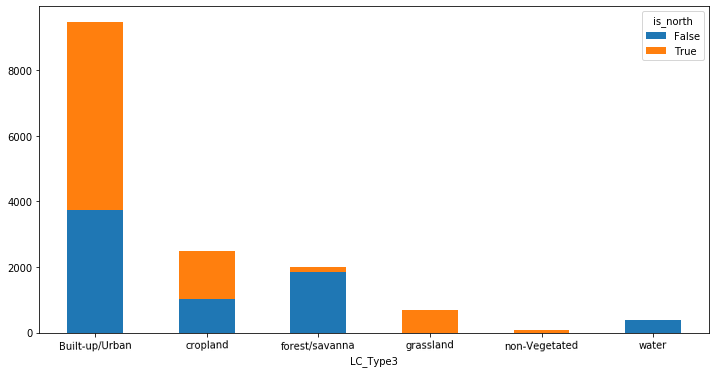

In [1241]:
pd.crosstab(master1.is_north, master1.LC_Type3).T.plot.bar(stacked=True, rot=1, figsize=(12,6))

In [273]:
pd.crosstab(master1.is_north, master1.LC_Type3, margins=True)

LC_Type3,Built-up/Urban,cropland,forest/savanna,grassland,non-Vegetated,water,All
is_north,,,,,,,
False,3740,1038,1863,0,0,376,7017
True,5736,1453,144,680,72,0,8085
All,9476,2491,2007,680,72,376,15102


In [1252]:
print(compare({'Fixed':res_base_LC,'Summer':res_summer_LC,'Winter':res_winter_LC}))

                                   Model Comparison                                   
                                                   Fixed         Summer         Winter
--------------------------------------------------------------------------------------
Dep. Variable                                   elec_use       elec_use       elec_use
Estimator                                       PanelOLS       PanelOLS       PanelOLS
No. Observations                                   14478           7296           7182
Cov. Est.                                     Unadjusted     Unadjusted     Unadjusted
R-squared                                         0.0087         0.0433         0.0086
R-Squared (Within)                                0.0087         0.0433         0.0086
R-Squared (Between)                              -0.0116         0.0110        -0.0230
R-Squared (Overall)                               0.0015         0.0318        -0.0111
F-statistic                                

In [274]:
master1.groupby('is_north')['elec_use'].describe()

,count,mean,std,min,25%,50%,75%,max
is_north,,,,,,,,
False,7017.0,174.273087,153.558212,0.0,76.000000,128.0,225.0,1698.0
True,8085.0,142.754272,105.668137,0.0,83.290001,115.0,174.0,1752.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c6b4766a0>,
      dtype=object)

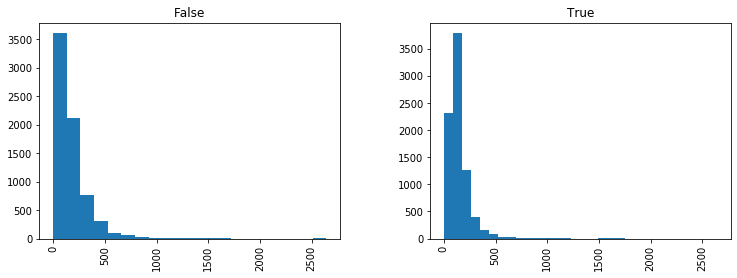

In [1618]:
master1.hist(column='elec_use', by='is_north',grid=True, figsize=(12,4), bins=20, sharex=True)

is_north
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: elec_use, dtype: object

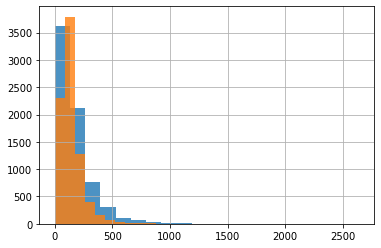

In [1617]:
master1.groupby('is_north')['elec_use'].hist(alpha=0.8, label='is_north',bins=20)

- From the table above, we could see there's a huge discrepancy in the distribution of forest and grassland across north vs south China. All the grasslands are in the north and almost all the forest/savannas are in the south. Therefore, the coefficient of grassland and forest could be driven by the differece in `elec_use`'s response to `DD_monthly` in south vs north China. The base coefficient of DD_montly is 0.1595 in the South and 0.0168 in the North, both higly siginificant.

- Combined with regression results from South China, where cropland and forest/savanna are significantly negatively correlated with elec_use, we find that in the north land cover type doesn't have a significant impact on energy use while in the south, Vegetation Cover will significantly reduce the impact of temperature on electricity consumption.

In [1581]:
north_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type3 + EntityEffects', 
                                 data=master1[master1['is_north'] ])
res_north_LC = north_LC.fit()
print(res_north_LC)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0035
Estimator:                   PanelOLS   R-squared (Between):             -0.0146
No. Observations:                8077   R-squared (Within):               0.0035
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0016
Time:                        20:21:05   Log-likelihood                -4.475e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.1812
Entities:                         772   P-value                           0.0001
Avg Obs:                       10.462   Distribution:                  F(5,7300)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             5.1812
                            

## South China

DD at 0.1576, cropland and forest all signi and negative

In [296]:
master[master['north']!='North'].LC_Type3.value_counts()

Urban/Built up              3740
forest/shrubland/savanna    1863
cropland                    1038
water                        376
barren                         0
grassland                      0
Name: LC_Type3, dtype: int64

In [1582]:
south_LC3 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type3 + EntityEffects', 
                                 data=master1[~master1['is_north'] ])

res_south_LC3 = south_LC3.fit()
print(res_south_LC3)

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0315
Estimator:                   PanelOLS   R-squared (Between):              0.0231
No. Observations:                6401   R-squared (Within):               0.0315
Date:                Sun, Mar 22 2020   R-squared (Overall):              0.0380
Time:                        20:22:04   Log-likelihood                -3.778e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      47.001
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.511   Distribution:                  F(4,5788)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             47.001
                            

##### Compare

In [1587]:
print(compare({'Fixed':res_base_LC,'North':res_north_LC,'South':res_south_LC3}))

                                   Model Comparison                                   
                                                   Fixed          North          South
--------------------------------------------------------------------------------------
Dep. Variable                                   elec_use       elec_use       elec_use
Estimator                                       PanelOLS       PanelOLS       PanelOLS
No. Observations                                   14478           8077           6401
Cov. Est.                                     Unadjusted     Unadjusted     Unadjusted
R-squared                                         0.0087         0.0035         0.0315
R-Squared (Within)                                0.0087         0.0035         0.0315
R-Squared (Between)                              -0.0116        -0.0146         0.0231
R-Squared (Overall)                               0.0015         0.0016         0.0380
F-statistic                                

##### LC_Type4

In [300]:
master[master['north']!='North'].LC_Type4.value_counts()

0.0    3740
1.0    2901
4.0     376
Name: LC_Type4, dtype: int64

In [301]:
master1[~master1['is_north']].LC_Type4.value_counts()

Built-up/Urban    3740
vege              2901
water              376
Name: LC_Type4, dtype: int64

In [302]:
south_LC4 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:C(LC_Type4) + EntityEffects', 
                                 data=master[master['north']!='North'])

print(south_LC4.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0331
Estimator:                   PanelOLS   R-squared (Between):              0.0236
No. Observations:                6400   R-squared (Within):               0.0331
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0394
Time:                        19:41:30   Log-likelihood                -3.765e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.116
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.509   Distribution:                  F(3,5788)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             66.116
                            

In [303]:

south_LC4 = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:LC_Type4 + EntityEffects', 
                                 data=master1[~master1['is_north'] ])
print(south_LC4.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0331
Estimator:                   PanelOLS   R-squared (Between):              0.0236
No. Observations:                6400   R-squared (Within):               0.0331
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0394
Time:                        19:41:30   Log-likelihood                -3.765e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.116
Entities:                         609   P-value                           0.0000
Avg Obs:                       10.509   Distribution:                  F(3,5788)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             66.116
                            

##### NonVege

In [305]:
south_NV = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:NonVege + EntityEffects', 
                                 data=master1[~master1['is_north'] ])
print(south_NV.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0314
Estimator:                   PanelOLS   R-squared (Between):              0.0153
No. Observations:                6340   R-squared (Within):               0.0314
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0344
Time:                        19:41:31   Log-likelihood                -3.729e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      92.833
Entities:                         603   P-value                           0.0000
Avg Obs:                       10.514   Distribution:                  F(2,5735)
Min Obs:                       3.0000                                           
Max Obs:                       12.000   F-statistic (robust):             92.833
                            

NonVege significant in south China not in the north

## Robust Checks

##### Urban vs Rural

In [306]:
master.urban.dtype

CategoricalDtype(categories=['city', 'town', 'rural'], ordered=True)

In [307]:
master1.urban.dtype

CategoricalDtype(categories=['城市（县级市及以上）', '乡镇', '农村'], ordered=True)

In [308]:
master.urban.value_counts(dropna=False)

city     9463
rural    3077
town     2514
NaN        48
Name: urban, dtype: int64

In [309]:
master1.urban.value_counts(dropna=False)

城市（县级市及以上）    9463
农村            3077
乡镇            2514
NaN             48
Name: urban, dtype: int64

In [310]:
pd.crosstab(master1['urban'], master['urban']) # wrong

urban,city,town,rural
urban,,,
city,9463,0,0
town,0,2514,0
rural,0,0,3077


In [311]:
pd.crosstab(master['urban'],master1['urban']) # wrong

urban,城市（县级市及以上）,乡镇,农村
urban,,,
城市（县级市及以上）,9463,0,0
乡镇,0,2514,0
农村,0,0,3077


In [313]:
urban_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(urban) + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['urban']))

print(urban_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0097
Estimator:                   PanelOLS   R-squared (Between):             -0.0064
No. Observations:               14441   R-squared (Within):               0.0097
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0065
Time:                        19:41:31   Log-likelihood                -8.271e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.016
Entities:                        1378   P-value                           0.0000
Avg Obs:                       10.480   Distribution:                 F(8,13055)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             16.016
                            

##### SF home vs NonSF

In [314]:
master.sf.value_counts(dropna=False)

0.0    10355
1.0     4747
Name: sf, dtype: int64

In [315]:
master1.sf.value_counts(dropna=False)

0.0    10319
1.0     4747
NaN       36
Name: sf, dtype: int64

In [317]:
# same as if sf is continuous
singlefamily_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:(sf) + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['sf']))

print(singlefamily_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0093
Estimator:                   PanelOLS   R-squared (Between):             -0.0072
No. Observations:               14453   R-squared (Within):               0.0093
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0049
Time:                        19:41:32   Log-likelihood                -8.279e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.486
Entities:                        1379   P-value                           0.0000
Avg Obs:                       10.481   Distribution:                 F(7,13067)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.486
                            

 the `sf` variable is hightly corelated with `urban`
 
so the effect is mostly driven by house being in a urban neighborhood or not

In [1588]:
pd.crosstab(master1['sf'],master1['urban'],margins=True)

urban,城市（县级市及以上）,乡镇,农村,All
sf,,,,
0.0,8758,1495,67,10320
1.0,706,1019,3010,4735
All,9464,2514,3077,15055


In [1589]:
pd.crosstab(master['sf'],master['urban'],margins=True)

urban,city,town,rural,All
sf,,,,
0.0,8758,1495,67,10320
1.0,706,1019,3010,4735
All,9464,2514,3077,15055


In [1590]:
pd.crosstab(master1['sf'],master['sf']) #master1.sf ==0 should be 10319

sf,0.0,1.0
sf,,
0.0,10356,0
1.0,0,4747


In [1591]:
pd.crosstab(master['sf'],master1['sf'])

sf,0.0,1.0
sf,,
0.0,10320,0
1.0,0,4747


##### Newer building

In [322]:
master.new.value_counts(dropna=False)

1.0    12510
0.0     2525
NaN       67
Name: new, dtype: int64

In [323]:
master1.new.value_counts(dropna=False)

1.0    12510
0.0     2525
NaN       67
Name: new, dtype: int64

In [324]:
master1.is_new.value_counts(dropna=False)

1.0    12510
0.0     2525
NaN       67
Name: is_new, dtype: int64

In [326]:
newbuilding_LC = PanelOLS.from_formula('elec_use ~ 1 + DD_monthly + DD_monthly:is_new + DD_monthly:(LC_Type3) + EntityEffects', 
                                 data=master1.dropna(subset=['is_new']))

print(newbuilding_LC.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:               elec_use   R-squared:                        0.0091
Estimator:                   PanelOLS   R-squared (Between):             -0.0098
No. Observations:               14422   R-squared (Within):               0.0091
Date:                Wed, Mar 18 2020   R-squared (Overall):              0.0032
Time:                        19:41:33   Log-likelihood                -8.261e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.115
Entities:                        1375   P-value                           0.0000
Avg Obs:                       10.489   Distribution:                 F(7,13040)
Min Obs:                       1.0000                                           
Max Obs:                       12.000   F-statistic (robust):             17.115
                            

## Machine Learning Models

In [330]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
#from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

### prepare training and test set

In [1593]:
to_delete = ['serial','zipcode','elec_ln']

In [1594]:
# from panel master1
dfml = master1.drop(labels=to_delete,  axis=1, inplace=False)

In [1595]:
master1.shape

(15103, 73)

In [1596]:
dfml.shape

(15103, 70)

In [1597]:
dfml._get_numeric_data().columns

Index(['elec_use', 'elec_bill', 'price', 'Month', 'respondent', 'latitude',
       'longitude', 'fsize', 'birthyr', 'edu_yrs', 'mths_at_home', 'level',
       'moveinyr', 'daystyd', 'owntyp', 'bathroom', 'balcony', 'DD_monthly',
       'goodday_count', 'LC_Type1', 'LC_Type2', 'NonTree_Vege', 'NonVege',
       'Tree_Cover', 'is_north', 'is_south', 'summer', 'is_summer', 'new',
       'is_new', 'sf', 'Vege_Cover', 'DD_sq'],
      dtype='object')

In [1598]:
# birthyr, moveinyr ?
to_convert_category = ['Month','birthyr','moveinyr','owntyp','LC_Type1','LC_Type2']

In [1599]:
dfml[to_convert_category] = dfml[to_convert_category].astype('category')

In [1600]:
dfml.dropna(axis=0, how='any', inplace=True)

In [1601]:
dfml.shape

(8837, 70)

In [1602]:
pd.get_dummies(dfml).head()

elec_use   elec_bill     price  respondent   latitude   longitude  \
ID month                                                                      
5  1         265.0  140.000000  0.528302         1.0  22.857195  110.550453   
   2         461.0  243.550003  0.528308         1.0  22.857195  110.550453   
   3         340.0  179.619995  0.528294         1.0  22.857195  110.550453   
   4         243.0  128.380005  0.528313         1.0  22.857195  110.550453   
   5         131.0   69.209999  0.528321         1.0  22.857195  110.550453   

          fsize  edu_yrs  mths_at_home  level  daystyd  bathroom  balcony  \
ID month                                                                    
5  1        5.0     12.0          12.0    3.0      7.0       2.0      1.0   
   2        5.0     12.0          12.0    3.0      7.0       2.0      1.0   
   3        5.0     12.0          12.0    3.0      7.0       2.0      1.0   
   4        5.0     12.0          12.0    3.0      7.0       2.0      1.0   
   5        5.0     12.0          12.0    3.0      7.0       2.0      1.0   

          DD_monthly  goodday_count  NonTree_Vege  NonVege  Tree_Cover  \
ID month                                                                 
5  1      317.130524            8.0          37.0     57.0         6.0   
   2       12.180555            8.0          37.0     57.0         6.0   
   3       17.901831            8.0          37.0     57.0         6.0   
   4      273.800171            9.0          37.0     57.0         6.0   
   5      300.616943           15.0          37.0     57.0         6.0   

          is_north  is_south  summer  is_summer  new  is_new   sf  Vege_Cover  \
ID month                                                                        
5  1         False      True       0      False  1.0     1.0  0.0        43.0   
   2         False      True       0      False  1.0     1.0  0.0        43.0   
   3         False      True       0      False  1.0     1.0  0.0        43.0   
   4         False      True       1       True  1.0     1.0  0.0        43.0   
   5         False      True       1       True  1.0     1.0  0.0        43.0   

                  DD_sq  Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  \
ID month                                                                        
5  1      100571.773438        1        0        0        0        0        0   
   2         148.365936        0        1        0        0        0        0   
   3         320.475555        0        0        1        0        0        0   
   4       74966.531250        0        0        0        1        0        0   
   5       90370.546875        0        0        0        0        1        0   

          Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  \
ID month                                                            
5  1            0        0        0         0         0         0   
   2            0        0        0         0         0         0   
   3            0        0        0         0         0         0   
   4            0        0        0         0         0         0   
   5            0        0        0         0         0         0   

          province_上海  ...  county__闵行区  county__阜康  county__阳曲县  county__阳朔县  \
ID month               ...                                                      
5  1                0  ...            0           0            0            0   
   2                0  ...            0           0            0            0   
   3                0  ...            0           0            0            0   
   4                0  ...            0           0            0            0   
   5                0  ...            0           0            0            0   

          county__阳谷县  county__阿鲁科尔沁旗  county__陆川县  county__青山区  county__青州  \
ID month                                                                      
5  1                0               0            0 

In [1603]:
X = pd.get_dummies(dfml).iloc[:,2:]

In [1604]:
X.shape

(8837, 845)

In [1605]:
y = pd.get_dummies(dfml).iloc[:,0]

In [1606]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.1, random_state=42 )

### Linear Regression

In [1607]:
ml_LR = LinearRegression()

In [1608]:
ml_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1609]:
ml_LR.score(X_train, y_train)

0.5230789891955842

In [1610]:
ml_LR.score(X_train, y_train)

0.5230789891955842

In [1611]:
ml_LR.score(X_test, y_test)

0.46327734464829434

In [1612]:
ml_LR.score(X_test, y_test)

0.46327734464829434

### Lasso

### Random Forest

### Boosting